<a href="https://colab.research.google.com/github/syoo970/link_15th/blob/master/%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers import Input, LSTM, Dense, Embedding
from keras.models import Sequential, Model
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras.utils import plot_model
import keras.backend as K

from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.decomposition import PCA
import tensorflow as tf 

import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import time

import pandas as pd
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv('drive/My Drive/딥러닝/추천시스템유사도함수/grade_item.csv', sep=",")
data.head()
data.index=data.iloc[:,0]

data = data.drop("CUSTOMER", 1)
data.head()
len(data.columns)
data.PERFORM.value_counts()

data.shape

factor_sum=0

for i in range(data.shape[1]):
    #print(len(data.iloc[:,i].value_counts()))
    factor_sum +=len(data.iloc[:,i].value_counts())
    
print(factor_sum)
	
colnames=data.columns
from random import shuffle



Using TensorFlow backend.


1023


In [0]:

data.shape

(70000, 93)

In [0]:

REP=1 # number of shuffled sentences
sentences = []
for i in range(data.shape[0]):
    if i%10000==0:
        print(i)
    for j in range(REP):
        sentence=list(colnames + data.iloc[i,:].map(str))
        np.random.shuffle(sentence)
        sentences.append(sentence)
    


0
10000
20000
30000
40000
50000
60000


In [0]:

from gensim.models import Word2Vec
embed_model = Word2Vec(sentences, sg=1, size=50, window=5, min_count=1)
embed_model.save("word2vec_ITEM_GRADE")
(embed_model.wv.vocab)
len(embed_model.wv.vocab) 
X = embed_model[embed_model.wv.vocab]
X.shape

index2word = {i: w for i, w in enumerate(embed_model.wv.index2word)} 
word2index = {w: i for i, w in index2word.items() }
len(word2index)
len(embed_model.wv.index2word)

word2index
(index2word.values())

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


dict_values(['LESR-ELEC2', 'BOOK8', 'FASH-MIS8', 'FURN-DESK2', 'FOOD-KIMCH8', 'LESR-SWIM8', 'FASH-JUR8', 'BEAT-MAST2', 'FOOD-DIET8', 'FOOD-AGR8', 'FURN-CHR2', 'LIFE-BATH5', 'BEAT-BODY2', 'FURN-CHID2', 'LESR-CAP8', 'FLOWER8', 'DIGI-AIR5', 'LESR-FISH8', 'FOOD-SIDI8', 'PERFORM5', 'DIGI-HARD8', 'LESR-BOX2', 'LESR-GOLF5', 'LESR-MTN2', 'FURN-KIT5', 'FOOD-MAR8', 'FOOD-DIET2', 'FOOD-PROC8', 'TRV-AIR2', 'BEAT-PERF8', 'BEAT-MAKE8', 'DIGI-AIR8', 'FASH-MIS5', 'FURN-REM5', 'BEAT-LOTT2', 'DIGI-SOUND2', 'CLOTH-MWAL5', 'LESR-HEAT8', 'BEAT-LOTT8', 'FURN-INN8', 'LESR-MTN8', 'CLOTH-WSHO5', 'FASH-MBAG8', 'LESR-BYKE2', 'FASH-MWAL2', 'DIGI-PRT8', 'LIFE-MOU2', 'LESR-CAP2', 'BEAT-ESSN2', 'LIFE-MASS8', 'DIGI-LIFE5', 'LIFE-PAP5', 'TRV-TIKE5', 'DIGI-PC2', 'ART8', 'FASH-WO5', 'BEAT-BODY8', 'FOOD-KIMCH2', 'CAT5', 'FLOWER2', 'BEAT-PERF5', 'FASH-MBAG2', 'DIGI-GAME8', 'FOOD-MAR2', 'OFFICE5', 'BEAT-HAIR2', 'FURN-BED8', 'FASH-WWAL8', 'LESR-OTH8', 'CLOTH-UND5', 'LESR-SWIM2', 'FASH-JUR5', 'LESR-SKI5', 'CLOTH-WATH8', 'LES

In [0]:
X.shape
print(X[0])

[ 0.0341557  -0.08927098  0.03382361 -0.1638097   0.09134093 -0.17930803
  0.08576461  0.11662612 -0.2455811   0.19888775  0.00329759 -0.06776812
 -0.17583008  0.32892758 -0.27347118 -0.02524644 -0.02334489  0.02630031
 -0.15968393  0.02021438  0.05803941  0.09614132  0.10938919 -0.04360309
  0.15450801 -0.163502   -0.00207337 -0.20948459 -0.05930554 -0.13076355
  0.00117054  0.05718241 -0.11085292 -0.04307263  0.09905367  0.03667771
  0.11088667 -0.17663327 -0.11728909 -0.10361182  0.337312   -0.00304944
 -0.08763673 -0.10349551 -0.06762073 -0.06472459  0.00279752  0.17805576
  0.23914963  0.13326646]


In [0]:

data_trans=[]
for i in range(data.shape[0]):
    sentence = sentences[i]
    tmp=[]
    for j in range(len(sentence)):
        tmp.append(X[word2index[sentence[j]]])
    data_trans.append(np.sum(tmp, axis=0)) # embedding vector를 합하여 한 id를 하나의 50-by-1 벡터로 표현 
    
    if i%10000==0:
        print(i)

data_trans2 = np.asarray(data_trans)
data_trans2.shape

pca = PCA(n_components=2)
result = pca.fit_transform(data_trans2)

cho_idx = np.random.choice(len(result), 100)
result2 = result[cho_idx ,]
result2


0
10000
20000
30000
40000
50000
60000


array([[ 5.66784978e-01,  1.53356624e+00],
       [ 1.18088937e+00,  1.68589115e+00],
       [-9.82145905e-01, -1.05745876e+00],
       [-2.94161648e-01,  1.07127202e+00],
       [ 1.01411203e-02, -7.28457451e-01],
       [-4.10011232e-01, -2.91719794e+00],
       [-5.05721331e-01, -2.35477343e-01],
       [-4.28481936e-01,  7.65594840e-01],
       [ 3.64097469e-02,  2.54749870e+00],
       [-1.02476716e+00, -1.09418750e+00],
       [ 3.11607957e-01,  1.20109367e+00],
       [-2.30509073e-01, -6.33417740e-02],
       [-2.91662127e-01,  7.61299193e-01],
       [-1.07725255e-01, -3.78095061e-01],
       [-1.45661390e+00,  1.82839632e+00],
       [-1.94711581e-01,  1.13941300e+00],
       [-1.37243998e+00, -1.12825811e+00],
       [-9.99723136e-01,  4.48397577e-01],
       [-7.52305388e-01, -9.28150535e-01],
       [-1.38086212e+00,  1.35878175e-01],
       [ 3.26456875e-01, -4.18750048e-01],
       [-2.85097766e+00,  3.28704983e-01],
       [ 5.54690063e-01,  5.61114132e-01],
       [ 2.

In [0]:
print(result.shape)


(70000, 2)


1 3728516.0590483886
2 3670667.3320501694
3 3646533.2336610085
4 3600855.192529899
5 3587073.4226124333
6 3574123.031723949
7 3571313.857641352
8 3530059.841820493
9 3531957.3265218325
10 3496798.674292772
11 3509590.83821698
12 3502826.317944279
13 3493263.7603646293
14 3463187.4679182963
15 3454499.3933853474
16 3452832.034156259
17 3474856.8050818956
18 3433942.958417868
19 3419629.7706834655


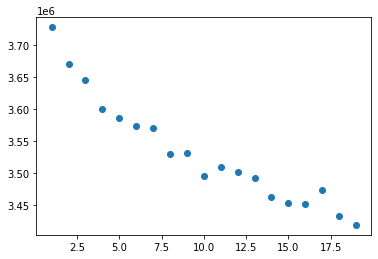

In [0]:

embed_model.score
len(data_trans)
from sklearn.cluster import MiniBatchKMeans

wss=[]
for i in range(1,20):
    kmeans=MiniBatchKMeans(n_clusters=i)
    kmeans.fit(data_trans)
    wss.append(kmeans.inertia_)
    print(i, kmeans.inertia_)
	
np.shape(data_trans)
plt.scatter(range(1,20), wss)
plt.show()

K=13
kmeans=MiniBatchKMeans(n_clusters=K)
kmeans.fit(data_trans)
clusters3 = kmeans.labels_
(clusters3)

clusters=clusters3
K=13
unique, counts = np.unique(clusters, return_counts=True)
clusters , K , unique , counts

n=data.shape[0]
H_C=0


In [0]:

for k in range(K): # k-th cluster
    n_k=counts[k]
    idx=np.where(clusters==k)
    n_category=0

    for j in range(data.shape[1]): # j-th attribute                
        x=data.iloc[idx[0], j]
        unique_x, counts_x = np.unique(x, return_counts=True)
        
        for m in range(len(counts_x)): # m-th category
            N_jk1=counts_x[m]
            H_C+=-(N_jk1/n_k * np.log(N_jk1/n_k)) * n_k / n
            n_category += 1        


In [0]:

N_jk1 , n_category, H_C

(321, 1023, 218.67343429566196)

(array([ 9,  5, 12,  3,  2,  4,  8, 10,  3, 12,  5,  4,  5, 11,  1, 12,  2,
         7,  2, 10, 12,  2, 11,  5,  3,  4,  4,  0, 10,  2,  4,  1,  5,  4,
         3,  7,  5,  1,  1,  4,  4,  4, 11, 12,  8,  7, 10,  1,  2,  8,  8,
         8,  5,  8,  9,  3,  1, 11,  6, 11,  8,  6, 12, 10,  1,  1,  4,  8,
         8,  4,  8,  2, 12,  2,  4,  7,  8,  3,  4,  4,  8,  6,  4,  4, 10,
         3,  3,  3,  4,  4,  4, 10,  1, 12,  8, 12, 11,  3,  1,  3],
       dtype=int32), (100, 2))

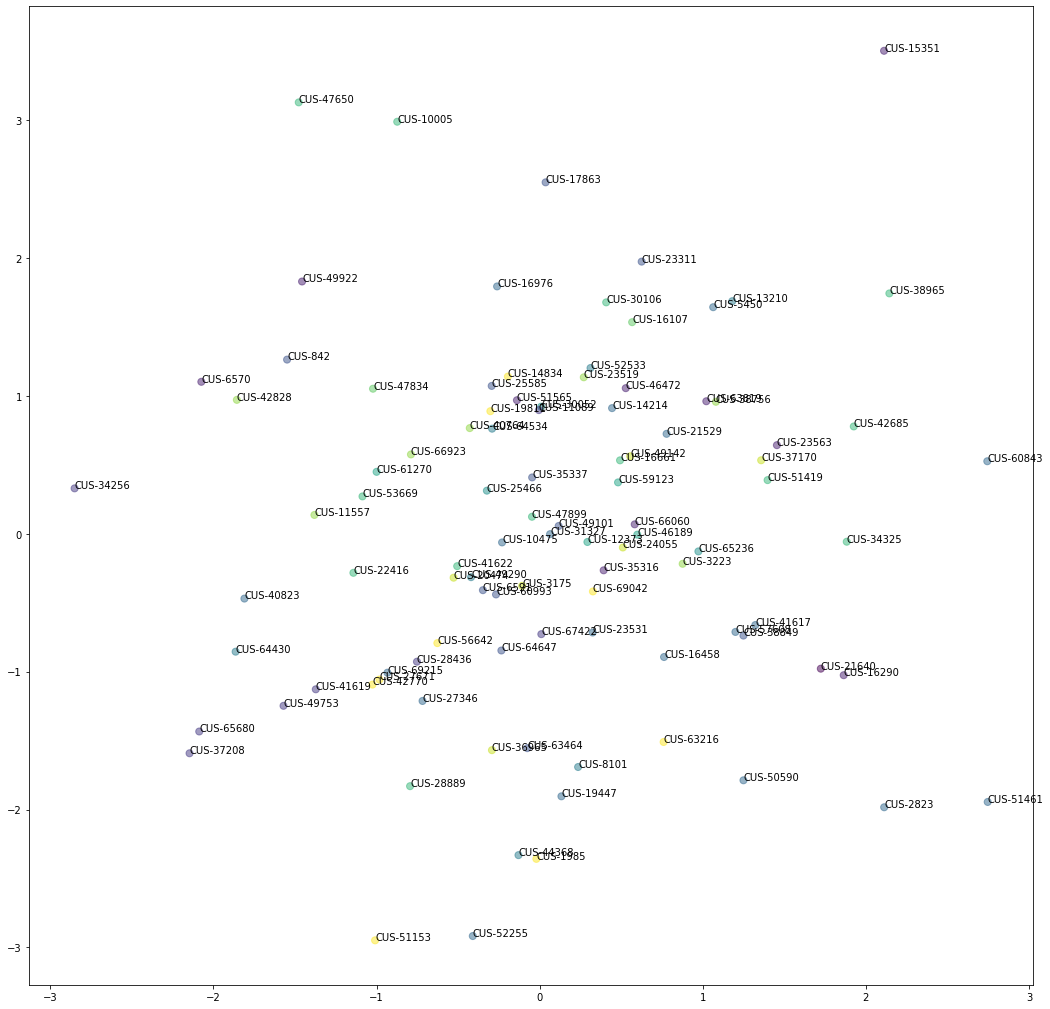

In [0]:

plt.figure(figsize=(18, 18)) 
area = 50
plt.scatter(result2[:, 0], result2[:, 1] , c=clusters[cho_idx]+1, s = area , alpha=0.5)
words = list(data.index[cho_idx])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result2[i, 0], result2[i, 1]))
plt.show()


clusters[cho_idx] ,  result2.shape

cus_names = list(data.index[cho_idx])
len(cus_names)

result3 = np.dot(result2 , result2.T)
result3

import pandas as pd 

df = pd.DataFrame(result3)
df.index = cus_names
df.columns = cus_names
df.to_csv("유사도_UBCF.csv")

